In [ ]:
##### PLEASE change the PATH of dataset, when you run this code!!!!!!

In [ ]:
##### PLEASE change the PATH of dataset, when you run this code!!!!!!

In [1]:
##### PLEASE change the PATH of dataset, when you run this code!!!!!!
import numpy as np
import pickle
from pathlib import Path

# Path to the unzipped CIFAR data
data_dir = Path("/Users/mmwr/downloads/cifar-10-batches-py/")

# Unpickle function provided by the CIFAR hosts
def unpickle(file):
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict

images, labels = [], []
for batch in data_dir.glob("data_batch_*"):
    batch_data = unpickle(batch)
    for i, flat_im in enumerate(batch_data[b"data"]):
        im_channels = []
        # Each image is flattened, with channels in order of R, G, B
        for j in range(3):
            im_channels.append(
                flat_im[j * 1024 : (j + 1) * 1024].reshape((32, 32))
            )
        # Reconstruct the original image
        images.append(np.dstack((im_channels)))
        # Save the label
        labels.append(batch_data[b"labels"][i])

print("Loaded CIFAR-10 training set:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

Loaded CIFAR-10 training set:
 - np.shape(images)     (50000, 32, 32, 3)
 - np.shape(labels)     (50000,)


2


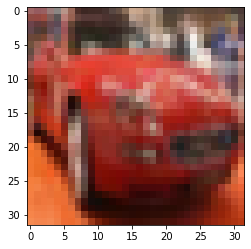

In [97]:
import matplotlib.pyplot as plt
plt.imshow(images[5])
img = images[6]
print(labels[57])

In [3]:
#find training data
#find the cat pictures and labeled with 1 and cars, birds pic are assigned as -1
#labels == 3 are cats
#labels == 2 are birds
#labels == 1 are cars
index = np.where((np.array(labels)[0:10000] == 1) |(np.array(labels)[0:10000] == 2)| (np.array(labels)[0:10000] == 3))
ind_cat = np.where(np.array(labels)[0:10000] == 3)
ind_car_bir = np.where((np.array(labels)[0:10000] == 1)| (np.array(labels)[0:10000] == 2))
images1 = np.array(images)
images1 = images1[index]
labels1 = np.array(labels)
labels1[ind_cat] = 1
labels1[ind_car_bir] = -1
y = labels1[index]
y_train = np.reshape(y,(len(y),1))
x_train = images1
print(x_train.shape)
print(y_train.shape)

(3022, 32, 32, 3)
(3022, 1)


In [4]:
#find testing data
index_t = np.where((np.array(labels)[10001:13000] == 1) |(np.array(labels)[10001:13000] == 2)| (np.array(labels)[10001:13000] == 3))
ind_cat_t = np.where(np.array(labels)[10001:13000] == 3)
ind_car_bir_t = np.where((np.array(labels)[10001:13000] == 1)| (np.array(labels)[10001:13000] == 2))
images2 = np.array(images)
images2 = images2[index_t]
labels2 = np.array(labels)
labels2[ind_cat_t] = 1
labels2[ind_car_bir_t] = -1
y1 = labels2[index_t]
y_test = np.reshape(y1,(len(y1),1))
x_test = images2
print(x_test.shape)
print(y_test.shape)

(897, 32, 32, 3)
(897, 1)


In [5]:
#normalize train data and test data
mean = np.mean(x_train, axis = (0,1,2,3))
std = np.std(x_train, axis = (0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
print(x_train.shape)
print(x_test.shape)

(3022, 32, 32, 3)
(897, 32, 32, 3)


In [6]:
#flatten matrix
x_train = x_train.reshape(3022, 3072)
x_test = x_test.reshape(897,3072)
print(x_train.shape)
print(x_test.shape)

(3022, 3072)
(897, 3072)


In [43]:
# Least_square solution
w0 = np.linalg.inv(x_train.T@x_train)
w_opt = w0@x_train.T@y_train
y_train_hat = np.sign(x_train@w_opt)
error_tran_data = [0 if i[0]==i[1] else 1 for i in np.hstack((y_train_hat, y_train))]
print('Errors of train samples (3022): ' +str(sum(error_tran_data)))
y_hat = np.sign(x_test@w_opt)
error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_test))]
print('Errors of test samples (897): '+ str(sum(error_vec)))

Errors of train samples (3022): 1520
Errors of test samples (897): 467


In [49]:
## Ridge Regression
# Find the best Lamda for minimum misclassification
lamda = np.array([0.5, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 2000.0, 5000.0, 10000.0, 50000.0, 100000.0, 500000.0])
N = len(lamda)
err = np.zeros((1,N))
err0 = np.zeros((1,N))
for i in range(N):
    lam = lamda[i]
    wr0 = np.linalg.inv(x_train.T@x_train + lam*np.identity(len(w0)))
    w_rr = wr0@x_train.T@y_train
    y_train_h = np.sign(x_train@w_rr)
    error_1 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_train_h, y_train))]
    arr_err0 = np.array(error_1)
    error0 = sum(arr_err0)
    err0[:,i] = error0
    yr_hat = np.sign(x_test@w_rr)
    error_2 = [0 if i[0]==i[1] else 1 for i in np.hstack((yr_hat, y_test))]
    arr_err = np.array(error_2)
    error = sum(arr_err)
    err[:,i] = error
min_value = np.amin(err)
index = np.where(err == min_value)
print(index)
print('Errors for differnt lamda for training data', err0/3022)
print('Errors for differnt lamda for testing data', err/897)
print('best lamda value', lamda[12])
print('Number of error in test data ', err[:,12])

(array([0]), array([12]))
Errors for differnt lamda for training data [[0.01522171 0.02415619 0.06816678 0.10787558 0.12706817 0.17372601
  0.19192588 0.21211118 0.22865652 0.24056916 0.27001985 0.2819325
  0.31568498]]
Errors for differnt lamda for testing data [[0.46822742 0.46265329 0.45707915 0.45819398 0.4671126  0.4671126
  0.4671126  0.45930881 0.45373467 0.45596433 0.45039019 0.44593088
  0.44147157]]
best lamda value 500000.0
Number of error in test data  [396.]


In [60]:
## Linear SVM 
from sklearn.svm import SVC
n_test = np.size(y_test)
n_train = np.size(y_train)
x_train_1 = np.hstack((x_train, np.ones((n_train,1)) ))
x_test_1 = np.hstack(( x_test, np.ones((n_test,1)) ))
clf = SVC(kernel='linear',C=0.00001)
clf.fit(x_train_1, y_train)
svm_tr = clf.predict(x_train_1)
y_hat_svmt = np.sign(svm_tr).reshape(n_train,1)
error_rate0 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_svmt, y_train))]
svm = clf.predict(x_test_1)
print('Errors of training data: '+ str(sum(error_rate0)))
y_hat_svm = np.sign(svm).reshape(n_test,1)
#w_svm = clf.coef_.transpose()
#y_hat_svm = np.sign(x_test_1@w_svm)
error_rate = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_svm, y_test))]
print('Errors of testing data: '+ str(sum(error_rate)))

/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Errors of training data: 1016
Errors of testing data: 305


In [61]:
##  rbf SVM 
clfr = SVC(kernel='rbf',gamma = 0.7,C=0.00001)
clfr.fit(x_train_1, y_train)
svm_r0 = clfr.predict(x_train_1)
y_hat_svmr0 = np.sign(svm_r0).reshape(n_train,1)
error_rate_r0 = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_svmr0, y_train))]
print('Errors: '+ str(sum(error_rate_r0)))
svm_r = clfr.predict(x_test_1)
y_hat_svmr = np.sign(svm_r).reshape(n_test,1)
#w_svm = clf.coef_.transpose()
#y_hat_svm = np.sign(x_test_1@w_svm)
error_rate_r = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat_svmr, y_test))]
print('Errors: '+ str(sum(error_rate_r)))

/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Errors: 1016
Errors: 305


In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train_1, y_train, cv=7)
print(scores)
scores_r = cross_val_score(clfr, x_train_1, y_train, cv=7)
print(scores_r)

/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.66435185 0.66435185 0.66435185 0.66435185 0.66203704 0.66357309
 0.66357309]


/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/mmwr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[0.66435185 0.66435185 0.66435185 0.66435185 0.66203704 0.66357309
 0.66357309]


In [88]:
## Neural network 
# x_train_1 and y_train to train model
q = np.shape(y_train)[1] #number of classification problems
p = 3072
W = np.random.randn(p+1, q);

alpha = 0.35 #step size
L = 3000 #number of epochs
n = 3022 
def tanh(_x):
    return np.tanh(_x)   ##1/(1+np.exp(-_x)) 465
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate 
        Yhat2 = tanh(x_train_1[[i],:]@W) 
         # Backpropagate
        delta = (Yhat2-y_train[[i],:])*(1-np.square(Yhat2))  ###Yhat2*(1-Yhat2)
        Wnew = W - alpha*x_train_1[[i],:].T@delta
        W = Wnew
print(W.shape)

(3073, 1)


In [89]:
## Predict on testing data for 2-layer Neural Network
Yhatnn = tanh(x_train_1@W)
error_nn0 = [0 if i[0]==i[1] else 1 for i in np.hstack((np.round(Yhatnn), y_train))]
print('Errors of training data: '+ str(sum(error_nn0)))
Yhat2 = tanh(x_test_1@W)
error_nn = [0 if i[0]==i[1] else 1 for i in np.hstack((np.round(Yhat2), y_test))]
print('Errors of testing data: '+ str(sum(error_nn)))
#y_test_nn = y_test/2+0.5
#error_nn2 = np.sum(abs(np.round(Yhat2)-y_test_nn))
#print('Errors, first classifier:', error_nn2)

Errors of training data: 953
Errors of testing data: 386


In [90]:
## Training NN model for X[3022,3072] take me more than 4hrs with 1000 hidden nodes and 1000 epoachs.
## hidden nodes = 2/3 inputs +outputs too large for me
## Then I stoped the calculation.
## I selected 1000 pics in x_train_1 and 300 damples in x_test_1 for NN 

In [91]:
x_train_2 = x_train_1[0:1000,:]
y_train_2 = y_train[0:1000,:]
x_test_2 = x_test_1[0:300,:]
y_test_2 = y_test[0:300,:]

In [92]:
M = 600 #number of hidden nodes

## initial weights
V3 = np.random.randn(M+1, q); 
W3 = np.random.randn(p+1, M);
print(V3.shape)

alpha = 0.35 #step size
L = 800 #number of epochs
n1 =1000

def tanh(_x):
    return np.tanh(_x)
        
for epoch in range(L):
    ind = np.random.permutation(n1)
    for i in ind:
        # Forward-propagate
        H = tanh(np.hstack((np.ones((1,1)), x_train_2[[i],:]@W3)))
        Yhat0 = tanh(H@V3)
         # Backpropagate
        delta = (Yhat0-y_train_2[[i],:])*(1-np.square(Yhat0))###Yhat0*(1-Yhat0)
        Vnew3 = V3-alpha*H.T@delta
        gamma = delta@V3[1:,:].T*(1-np.square(H[:,1:]))  ###H[:,1:]*(1-H[:,1:])
        Wnew3 = W3 - alpha*x_train_2[[i],:].T@gamma
        V3 = Vnew3
        W3 = Wnew3
print(V3.shape)
print(W3.shape)

(601, 1)
(601, 1)
(3073, 600)


In [93]:
## Final predicted labels (on training data)
n0 =300
H3 = tanh(np.hstack((np.ones((n0,1)), x_test_2@W3)))
Yhat3 = tanh(H3@V3)
error_nn3 = [0 if i[0]==i[1] else 1 for i in np.hstack((Yhat3, y_test_2))]
print('Errors: '+ str(sum(error_nn3)))


Errors: 154
